<a href="https://colab.research.google.com/github/noorulghousiah/DeepLearning/blob/main/07_FFNN_CaliforniaHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Step 1: Load the dataset
data = fetch_california_housing()
X, y = data.data, data.target

In [ ]:
# Convert to DataFrame for visualization
df = pd.DataFrame(X, columns=data.feature_names)
df['Target'] = y

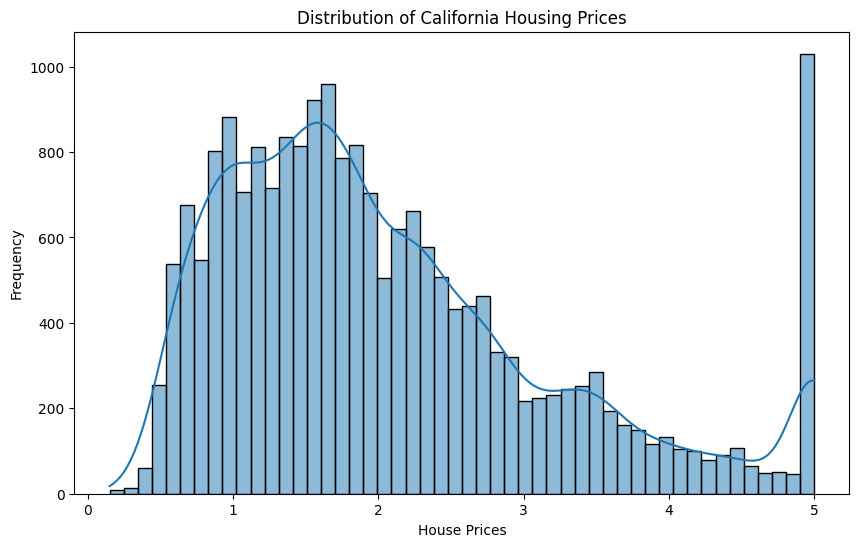

In [ ]:
# Step 2: Visualize the dataset
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=50, kde=True)
plt.xlabel('House Prices')
plt.ylabel('Frequency')
plt.title('Distribution of California Housing Prices')
plt.show()

In [ ]:
# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape,

((16512, 8), (4128, 8), (16512,), (4128,))

In [ ]:
# Step 4: Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [ ]:
# Step 5: Define the FFNN model
import torch.nn.functional as F
class FFNN(nn.Module):
    def __init__(self, in_features=8, h1=8, h2=9, out_features=1):   #output is 1 because only 1 target= house price
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    # input layer
        self.fc2 = nn.Linear(h1, h2)            # hidden layer
        self.out = nn.Linear(h2, out_features)  # output layer

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [ ]:
# Step 6: Initialize model, loss, and optimizer

## YOUR CODE HERE
torch.manual_seed(32)
model = FFNN()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [ ]:


epochs = 100
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)

    # a neat trick to save screen space:
    if i%10 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1  loss: 5.22714329
epoch: 11  loss: 3.93773723
epoch: 21  loss: 1.96108139
epoch: 31  loss: 1.11669898
epoch: 41  loss: 0.78299934
epoch: 51  loss: 0.71941215
epoch: 61  loss: 0.66098648
epoch: 71  loss: 0.61167777
epoch: 81  loss: 0.56959099
epoch: 91  loss: 0.52817976


In [ ]:
pred = model(X_train)
output = loss(pred, y_train)

print("Prediction: " ,pred)
print("Output: " , output)

In [ ]:
# Step 9: Evaluate the model
model.eval()
y_pred = model(X_test).detach().numpy()
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f'Test MSE: {test_mse:.4f}')


Test MSE: 0.5221


Text(0.5, 0, 'epoch')

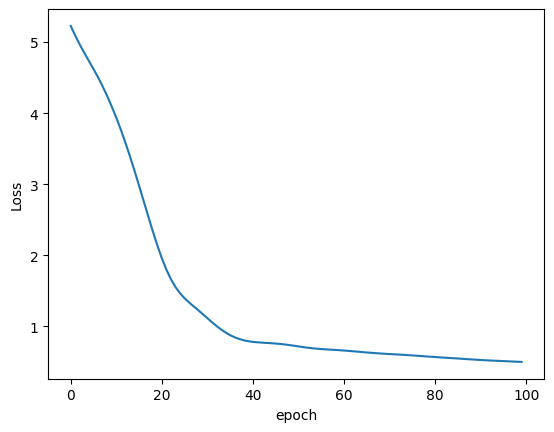

In [ ]:
# Convert losses to NumPy before plotting
losses_np = [loss.detach().numpy() for loss in losses]

plt.plot(range(epochs), losses_np)
plt.ylabel('Loss')
plt.xlabel('epoch')